In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation=doc['annotation']


In [2]:
tss_annotation = doc['tss_annotation']

In [3]:

import os
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm
### notebook specific configuration ###
from os.path import basename
#mpl.style.use('ggplot')
mpl.style.use('fivethirtyeight')
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

from Modules.Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 16)


In [4]:
data_folder = '../Processed/'

In [5]:
sys.path.append('/home/isshamie/software/homebrew/parallel_functions/')
import parallel_functions as pf

In [6]:
sys.path.append('/home/isshamie/software/NGS-Pipeline')

In [7]:
totalRNA_files = []

input_files = []
annotated_peak_files=[] #Using Homer's annotation of peaks
tss_folder = []

# Running each tissue and experiment separately

## Separate peaks based on exons/promoters

In [ ]:
if not os.path.exists('Results/coverage_peaks'):
    os.mkdir('Results/coverage_peaks')

In [ ]:
org ='ch'

if not os.path.exists('Results/coverage_peaks'):
    os.mkdir('Results/coverage_peaks')
    
    
for t in tissues:
    for s in ['GRO','mSTART']:
        if not os.path.exists(os.path.join(data_folder,t,s,'f06_annoPeaks','merge_bg_2.anno_exon')):
            continue 
        peak_f_exon = os.path.join(data_folder,t,s,'f06_annoPeaks','merge_bg_2.anno_exon')
        peak_f_promoter = os.path.join(data_folder,t,s,'f06_annoPeaks','merge_bg_2.anno_promoter')
        prom = pd.read_csv(peak_f_promoter,sep='\t')
        exon = pd.read_csv(peak_f_exon,sep='\t')
        
        if s == 'GRO':
            tss_tag = glob.glob(os.path.join(data_folder,t,s,'f03_tags/') + '/*5GRO*')
            inp_tag = glob.glob(os.path.join(data_folder,t,s,'f03_tags') + '/*_GRO*')
        else:
            tss_tag = glob.glob(os.path.join(data_folder,t,s,'f03_tags/') + '/*_mSTART_*')
            inp_tag = glob.glob(os.path.join(data_folder,t,s,'f03_tags') + '/*mSTARTinput*')            
        
#         tag_fs = glob.glob(os.path.join(data_folder,t,s,'f03_tags/') + '/*')
    
#         print(tss_tag)
#         print(inp_tag)

        cmd = "annotatePeaks.pl {peak_f} {org} -size 200 -hist 25 -ghist -d".format(peak_f = peak_f_promoter,
                                                                                   org=org)
        cmd_inp = cmd
        
        for i in tss_tag:
            cmd = "{cmd} {tag_f}".format(cmd = cmd,tag_f=i)
        
        for i in inp_tag:
            cmd_inp = "{cmd_inp} {tag_f}".format(cmd_inp = cmd_inp,tag_f=i)
        
        
        out_file = 'Results/coverage_peaks/' + t + '_' + s + '_coverage_promoters_tss'
        cmd = "{cmd} > {out}".format(cmd=cmd,out=out_file)
        print(cmd)
        !{cmd}
        
        out_file_inp = 'Results/coverage_peaks/' + t + '_' + s + '_coverage_promoters_inp'
        cmd_inp = "{cmd_inp} > {out}".format(cmd_inp=cmd_inp,out=out_file_inp)        
        print(cmd_inp)
        !{cmd_inp}
        
        ## Same,but with exon
        cmd_exon = cmd.replace('promoter','exon')
        print(cmd_exon)
        !{cmd_exon}
        ## Same,but with exon
        cmd_inp_exon = cmd_inp.replace('promoter','exon')
        print(cmd_inp_exon)
        !{cmd_inp_exon}
            
        ## Remove the ghist. This is for corresponding the columns to the files
        cmd = cmd.replace(' -ghist','')
        cmd = cmd.partition('>')[0] + '> ' + out_file + '_hist'
        print(cmd)
        !{cmd}
        
#         cmd_exon = cmd.replace('promoter','exon')
#         print(cmd_exon)
    
        cmd_inp = cmd_inp.replace(' -ghist','')
        cmd_inp = cmd_inp.partition('>')[0] + '> ' + out_file_inp + '_hist'
        print(cmd_inp)
        !{cmd_inp}
        
#         cmd_inp_exon = cmd_inp.replace('promoter','exon')
#         print(cmd_inp_exon)

annotatePeaks.pl ../Processed/BMDMwt/GRO/f06_annoPeaks/merge_bg_2.anno_promoter ch -size 200 -hist 25 -ghist -d ../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_5GRO_JHS1033_SD_TAGCTT_S48_L003_R1_001.fastq > Results/coverage_peaks/BMDMwt_GRO_coverage_promoters_tss

	Peak file = ../Processed/BMDMwt/GRO/f06_annoPeaks/merge_bg_2.anno_promoter
	Genome = ch
	Organism = null
	Peak Region set to 200
	-----------------------------------------------------
	Histogram mode activated (bin size = 25 bp)
	-----------------------------------------------------
	Will create histogram for each gene
	Tag Directories:
		../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_5GRO_JHS1033_SD_TAGCTT_S48_L003_R1_001.fastq
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 29816
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 29816
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 


	Peak file = ../Processed/BMDMwt/GRO/f06_annoPeaks/merge_bg_2.anno_promoter
	Genome = ch
	Organism = null
	Peak Region set to 200
	-----------------------------------------------------
	Histogram mode activated (bin size = 25 bp)
	-----------------------------------------------------
	Tag Directories:
		../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001.fastq
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 29816
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 29816
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Resizing peaks...
	Reading Positions...
	-----------------------
	Compiling per bp Histograms...
	Finding Tags in Peaks from each directory...
	Ratio for ../Processed/BMDMwt/GRO/f03_tags/tr

	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 32133
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 32133
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Resizing peaks...
	Reading Positions...
	-----------------------
	Compiling per bp Histograms...
	Finding Tags in Peaks from each directory...
	Ratio for ../Processed/Brain/GRO/f03_tags/trim_CHBrain_5GRO_JHS1036_SD_ATGTCA_S51_L003_R1_001.fastq : 0.396521664377481
	Processing tags from ../Processed/Brain/GRO/f03_tags/trim_CHBrain_5GRO_JHS1036_SD_ATGTCA_S51_L003_R1_001.fastq
	10000


In [10]:
cmd

'annotatePeaks.pl ../Processed/CHO/mSTART/f06_annoPeaks/merge_bg_2.anno_promoter ch -size 200 -hist 25 -d > Results/coverage_peaks/CHO_mSTART_coverage_promoters_tss_hist'

In [141]:
!annotatePeaks.pl ../Processed/BMDMwt/GRO/f06_annoPeaks/merge_bg_2.anno_promoter ch -size 200 -hist 25 -d  ../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_5GRO_JHS1033_SD_TAGCTT_S48_L003_R1_001.fastq ../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001.fastq > Results/coverage_peaks/BMDMwt_GRO_coverage_promoters_hist



	Peak file = ../Processed/BMDMwt/GRO/f06_annoPeaks/merge_bg_2.anno_promoter
	Genome = ch
	Organism = null
	Peak Region set to 200
	-----------------------------------------------------
	Histogram mode activated (bin size = 25 bp)
	-----------------------------------------------------
	Tag Directories:
		../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_5GRO_JHS1033_SD_TAGCTT_S48_L003_R1_001.fastq
		../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001.fastq
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 29816
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 29816
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Resizing peaks...
	Reading Positions...
	-----------------------
	Compiling per bp Histograms..

In [142]:
!annotatePeaks.pl ../Processed/BMDMwt/GRO/f06_annoPeaks/merge_bg_2.anno_promoter ch -size 200 -hist 25 -ghist -d ../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_5GRO_JHS1033_SD_TAGCTT_S48_L003_R1_001.fastq ../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001.fastq > Results/coverage_peaks/BMDMwt_GRO_coverage_promoters


	Peak file = ../Processed/BMDMwt/GRO/f06_annoPeaks/merge_bg_2.anno_promoter
	Genome = ch
	Organism = null
	Peak Region set to 200
	-----------------------------------------------------
	Histogram mode activated (bin size = 25 bp)
	-----------------------------------------------------
	Will create histogram for each gene
	Tag Directories:
		../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_5GRO_JHS1033_SD_TAGCTT_S48_L003_R1_001.fastq
		../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001.fastq
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 29816
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 29816
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Resizing peaks...
	Reading Positions...
	-----------------

In [167]:
!annotatePeaks.pl ../Processed/BMDMwt/GRO/f06_annoPeaks/merge_bg_2.anno_exon ch -size 200 -hist 25 -ghist -d ../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_5GRO_JHS1033_SD_TAGCTT_S48_L003_R1_001.fastq ../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001.fastq > Results/coverage_peaks/BMDMwt_GRO_coverage_exons


	Peak file = ../Processed/BMDMwt/GRO/f06_annoPeaks/merge_bg_2.anno_exon
	Genome = ch
	Organism = null
	Peak Region set to 200
	-----------------------------------------------------
	Histogram mode activated (bin size = 25 bp)
	-----------------------------------------------------
	Will create histogram for each gene
	Tag Directories:
		../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_5GRO_JHS1033_SD_TAGCTT_S48_L003_R1_001.fastq
		../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001.fastq
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 5310
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 5310
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Resizing peaks...
	Reading Positions...
	-----------------------

In [ ]:
outfile

In [169]:
cov_promoter = pd.read_csv('Results/coverage_peaks/BMDMwt_GRO_coverage_promoters',sep='\t',index_col=0)

## Convert negative numbers to 0 b/c these are really small numbers and there should be no negative values. Seems like a computing error.
mask = cov_promoter<0
cov_promoter[mask] = 0


In [143]:
curr_h = pd.read_csv('Results/coverage_peaks/BMDMwt_GRO_coverage_promoters_hist',sep='\t',index_col=0)
labels = curr_h.columns[curr_h.columns.str.contains(u'\+ Tags')].values
labels

array([ '../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_5GRO_JHS1033_SD_TAGCTT_S48_L003_R1_001.fastq + Tags',
       '../Processed/BMDMwt/GRO/f03_tags/trim_CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001.fastq + Tags'], dtype=object)

In [168]:
cov_exon = pd.read_csv('Results/coverage_peaks/BMDMwt_GRO_coverage_exons',sep='\t',index_col=0)

## Convert negative numbers to 0 b/c these are really small numbers and there should be no negative values. Seems like a computing error.
mask = cov_exon<0
cov_exon[mask] = 0


## Calculate coverage around peak areas
*Not just histogram but a value for each peak

## Plot the log fold change for each peak and make a pdf and CDF

In [ ]:
## Create fold change over range of bins
bins = [-75,-50,25,0,25,50,75]

seqs = ['mSTART','GRO']

fold_change = pd.DataFrame(columns=['Seq','Tissue','Log2_FC','f1','f2'])
for t in tissues:
    for s in seqs:
        os.path.join('Results/coverage_peaks/',t+'_'+s)
        out_file = 'Results/coverage_peaks/' + t + '_' + s + '_coverage_promoters'
        cov_promoter = pd.read_csv(out_file,sep='\t',index_col=0)
        
        out_file = 'Results/coverage_peaks/' + t + '_' + s + '_coverage_exons'
        cov_exon = pd.read_csv(out_file,sep='\t',index_col=0)
        
        
        for ind,val in cov_promoter.iterrows():
            sig = []
            bg = []
            for i in bins:
        #         print(str(i))
        #         print(val[str(i)])
                val[str(i)]
                sig.append(val[str(i)])
                bg.append(val[str(i) + '.1'])
                assert(len(bg) == len(sig))
            cov_promoter.at[ind,'log2_FC'] = np.log2(np.sum(sig)+1) - np.log2(np.sum(bg)+1)



        cov_exon['log2_FC'] = 0.0


        for ind,val in cov_exon.iterrows():
            sig = []
            bg = []
            for i in bins:
        #         print(str(i))
        #         print(val[str(i)])
                val[str(i)]
                sig.append(val[str(i)])
                bg.append(val[str(i) + '.1'])
                assert(len(bg) == len(sig))
            cov_exon.at[ind,'log2_FC'] = np.log2(np.sum(sig)+1) - np.log2(np.sum(bg)+1)


In [170]:
## Create fold change over range of bins
bins = [-75,-50,25,0,25,50,75]

'''For every 5gro, collect gro and calculate fold change of the sum over the 150 bps in the center
## Input:
    ## Tissue,sequence,folder of results, promoter_width
    
## Output:
## Pandas DataFrame where columns are: 
    ## seq: string; either GRO or mSTART
    tissue: string
    FC: numpy array; Fold changes of tss over input
    filename_tss: string;TSS tag file,
    filename_in: istring;nput tag file,
    promoter_width: 2-element tuple; Defines distance from reference to be considered a promoter

'''

cov_promoter['log2_FC'] = 0.0


for ind,val in cov_promoter.iterrows():
    sig = []
    bg = []
    for i in bins:
#         print(str(i))
#         print(val[str(i)])
        val[str(i)]
        sig.append(val[str(i)])
        bg.append(val[str(i) + '.1'])
        assert(len(bg) == len(sig))
    cov_promoter.at[ind,'log2_FC'] = np.log2(np.sum(sig)+1) - np.log2(np.sum(bg)+1)



cov_exon['log2_FC'] = 0.0


for ind,val in cov_exon.iterrows():
    sig = []
    bg = []
    for i in bins:
#         print(str(i))
#         print(val[str(i)])
        val[str(i)]
        sig.append(val[str(i)])
        bg.append(val[str(i) + '.1'])
        assert(len(bg) == len(sig))
    cov_exon.at[ind,'log2_FC'] = np.log2(np.sum(sig)+1) - np.log2(np.sum(bg)+1)


## Plot pdfs/cdf


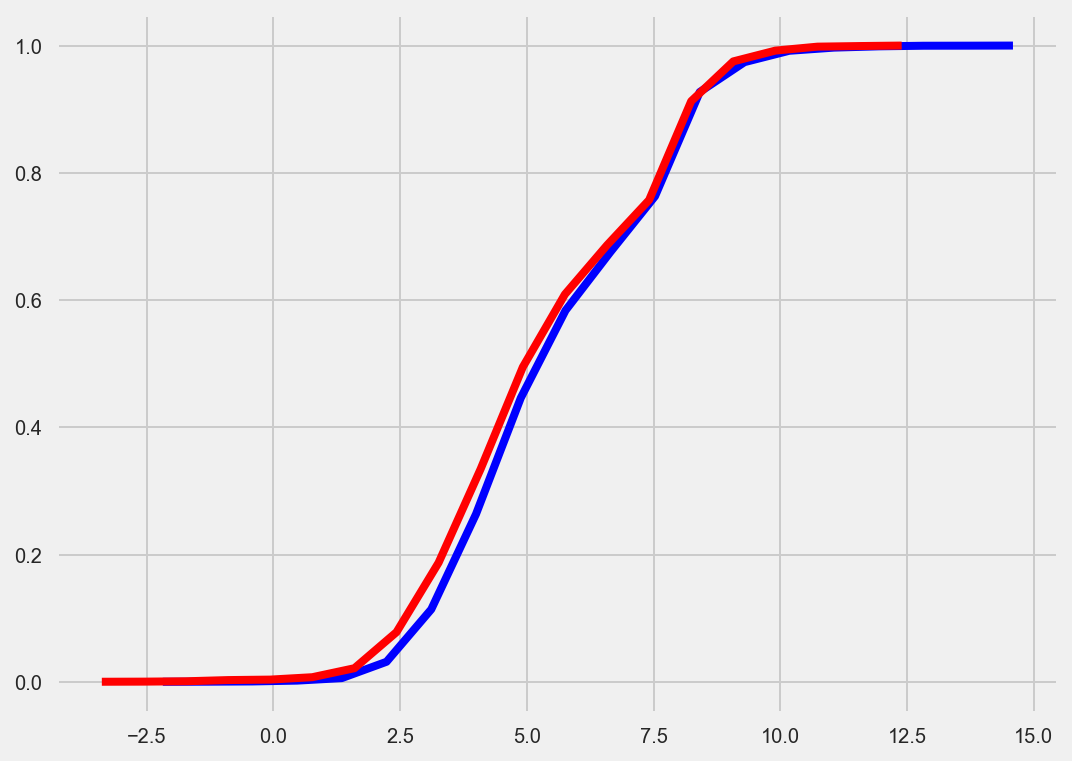

In [172]:
f = plt.figure()
num_bins = 20
counts, bin_edges = np.histogram (cov_promoter['log2_FC'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])


counts, bin_edges = np.histogram (cov_exon['log2_FC'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1],color='r')


In [116]:
break_points = [0]
for i in range(len(labels)-1):
       break_points.append(np.flatnonzero(cov.columns.str.contains('\.'+str(i+1)))[0])
break_points.append(len(cov.columns))
new_v = np.flatnonzero(cov.columns.str.contains('\.'))[0]


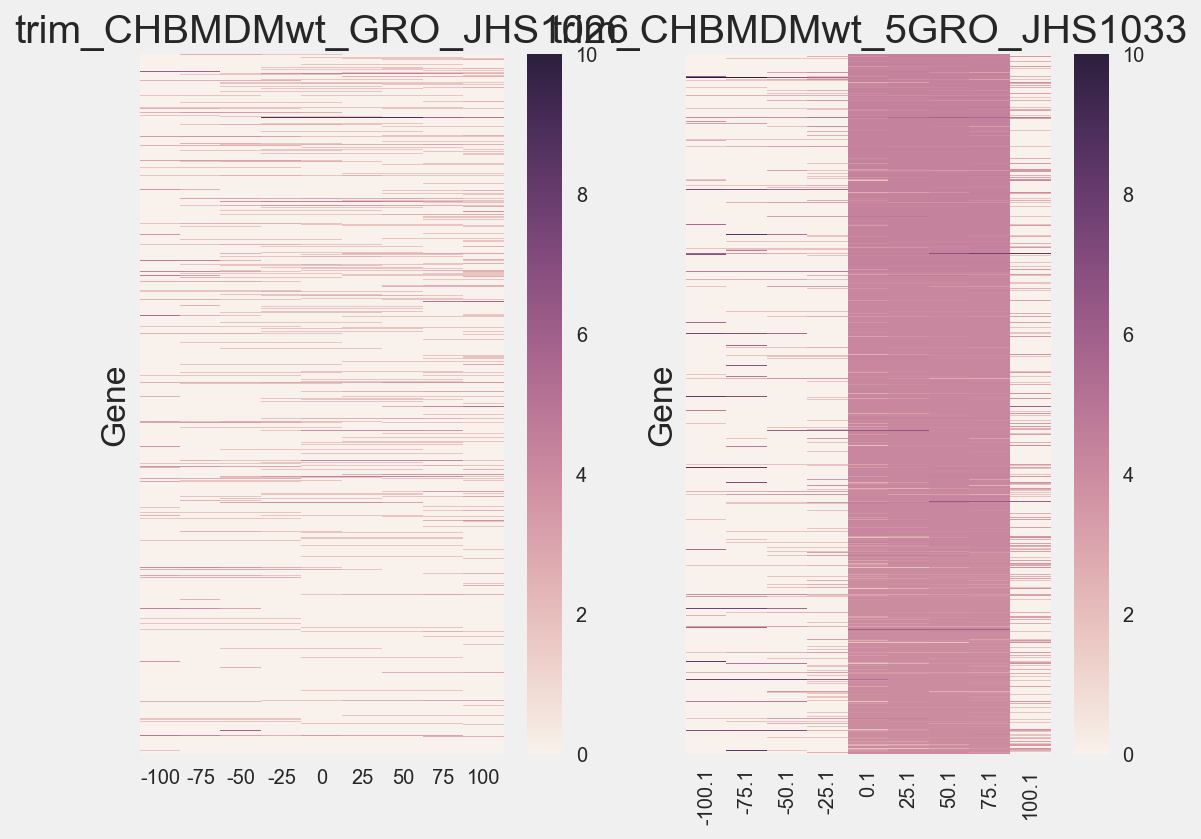

In [121]:
#f = plt.figure()
fig, axes = plt.subplots(1, len(break_points)-1)

# if len(break_points) == 0:
#     sns.heatmap(np.log(cov.tail(1000)+1),yticklabels=False,
#             ax=axes[0])

# else:

for i in range(len(break_points)-1):
    sns.heatmap(np.log2(cov.tail(1000)+1).iloc[:,break_points[i]:break_points[i+1]],yticklabels=False,
               ax=axes[i],vmin=0,vmax=10)
    axes[i].set_title(os.path.basename(labels[i]).partition('_SD')[0])

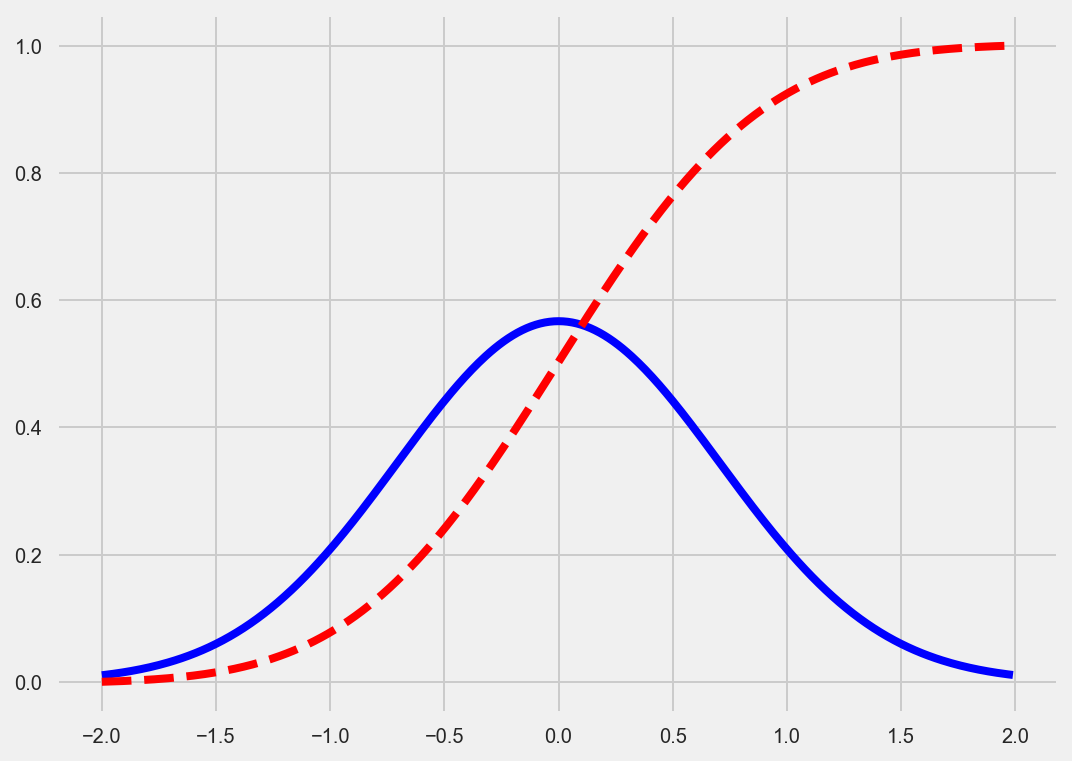

In [165]:
import numpy as np

# Create some test data
dx = .01
X  = np.arange(-2,2,dx)
Y  = np.exp(-X**2)

# Normalize the data to a proper PDF
Y /= (dx*Y).sum()

# Compute the CDF
CY = np.cumsum(Y*dx)

# Plot both
f = plt.figure()
plt.plot(X,Y)
plt.plot(X,CY,'r--')



ValueError: x and y must have same first dimension, but have shapes (197,) and (29816,)

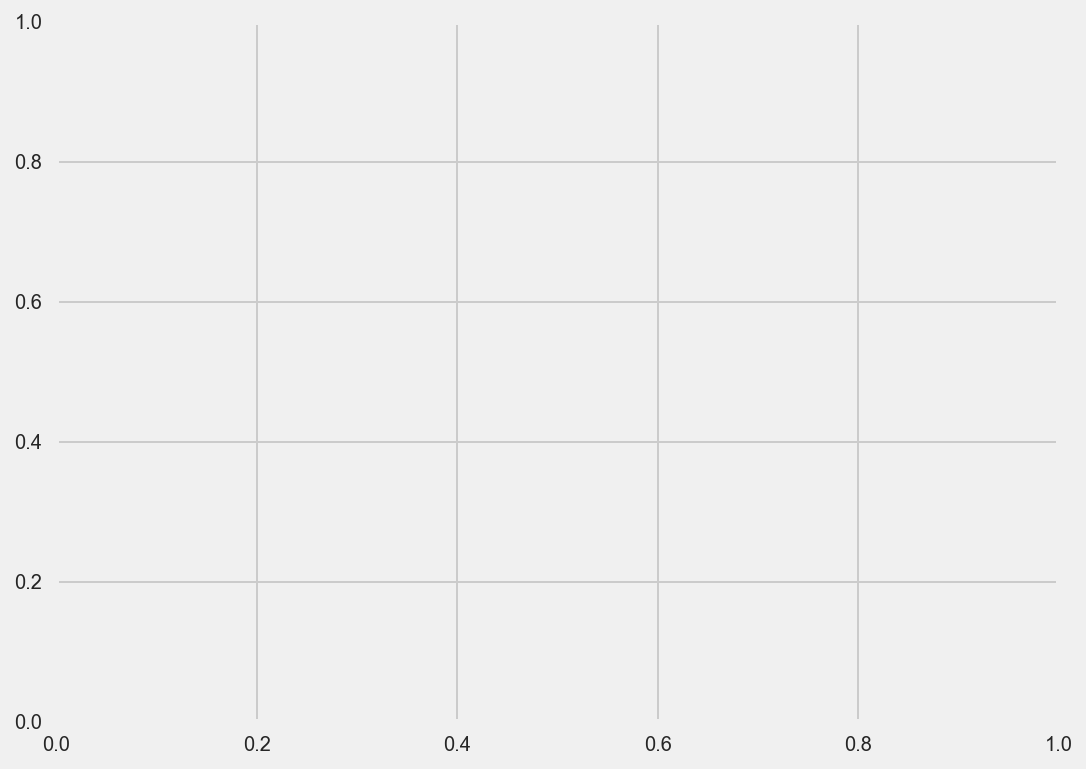

In [164]:
import numpy as np

# Create some test data
dx = .1
X  = np.arange(cov['log2_FC'].min()-1,cov['log2_FC'].max()+1,dx)
Y  = cov['log2_FC']

# Normalize the data to a proper PDF
Y /= (dx*Y).sum()

# Compute the CDF
CY = np.cumsum(Y*dx)

# Plot both
f = plt.figure()
plt.plot(X,Y)
plt.plot(X,CY,'r--')



In [136]:
cov

,-100,-75,-50,-25,0,25,50,75,100,-100.1,-75.1,-50.1,-25.1,0.1,25.1,50.1,75.1,100.1,log2_FC
Gene,,,,,,,,,,,,,,,,,,,
Merged-picr_13-30535388-2,0.000000,0.000000,0.000000,0.000000,252.000000,364.000000,760.666667,1031.333333,814.333333,0.000000,0.000000e+00,0.000000,0.000000,147101.226667,147178.933333,147542.400000,147973.546667,8.798400e+02,-8
Merged-picr_4-25936573-2,0.000000,2.333333,4.666667,25.666667,67.666667,86.333333,86.333333,65.333333,23.333333,0.000000,0.000000e+00,203.040000,18511.733333,75761.493333,88392.586667,88197.066667,69888.373333,1.263861e+04,-10
Merged-picr_35-2820615-2,0.000000,0.000000,2.333333,2.333333,95.666667,147.000000,219.333333,240.333333,189.000000,0.000000,0.000000e+00,45.120000,45.120000,48135.520000,48436.320000,48486.453333,48907.573333,8.272000e+02,-8
Merged-picr_0-78615-2,4.666667,7.000000,9.333333,4.666667,58.333333,70.000000,161.000000,189.000000,142.333333,0.000000,0.000000e+00,0.000000,0.000000,23891.040000,23936.160000,24066.506667,24246.986667,3.559467e+02,-7
Merged-picr_93-5056837-2,0.000000,2.333333,9.333333,11.666667,53.666667,53.666667,49.000000,51.333333,9.333333,0.000000,0.000000e+00,0.000000,90.240000,22585.066667,22587.573333,22587.573333,22497.333333,3.509333e+01,-8
Merged-picr_7b-24939706-2,0.000000,0.000000,0.000000,4.666667,25.666667,25.666667,25.666667,21.000000,0.000000,0.000000,0.000000e+00,52.640000,629.173333,20003.200000,20243.840000,20193.706667,19617.173333,2.431467e+02,-9
Merged-picr_1605-18295-2,0.000000,0.000000,0.000000,2557.333333,4638.666667,4643.333333,4643.333333,2104.666667,93.333333,0.000000,0.000000e+00,0.000000,9089.173333,19787.626667,19787.626667,19787.626667,10738.560000,8.021333e+01,-2
Merged-picr_76-6736136-2,0.000000,0.000000,0.000000,16.333333,44.333333,53.666667,60.666667,44.333333,16.333333,1534.080000,1.752160e+03,2208.373333,4080.853333,18296.160000,18845.120000,18554.346667,15937.386667,1.138027e+03,-8
Merged-picr_2-72248928-2,0.000000,2.333333,7.000000,30.333333,86.333333,84.000000,93.333333,77.000000,21.000000,591.573333,2.727253e+03,8304.586667,9094.186667,16897.440000,14834.453333,9442.613333,9121.760000,8.923733e+02,-7


-----------